In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import scipy.stats as stats
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#importing the data
churn=pd.read_csv("Churn.csv")
churn

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

In [3]:
# to drop the first column "unnamed :0" from the data
df = churn.iloc[:,1:]
df


state      area.code  account.length voice.plan  voice.messages  \
0       KS  area_code_415             128        yes              25   
1       OH  area_code_415             107        yes              26   
2       NJ  area_code_415             137         no               0   
3       OH  area_code_408              84         no               0   
4       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4995    HI  area_code_408              50        yes              40   
4996    WV  area_code_415             152         no               0   
4997    DC  area_code_415              61         no               0   
4998    DC  area_code_510             109         no               0   
4999    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0           no       10.0           3         2.70     265.1        110   
1           no       13.7           3         3.70     161.6        123   
2           no       12.2           5         3.29     243.4        114   
3          yes        6.6           7         1.78     299.4         71   
4          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4995        no        9.9           5         2.67     235.7        127   
4996        no       14.7           2         3.97     184.2         90   
4997        no       13.6           4         3.67     140.6         89   
4998        no        8.5           6         2.30     188.8         67   
4999        no        9.3          16         2.51     129.4        102   

     day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0         45.07    197.4         99       16.78       244.7           91   
1         27.47    195.5        103       16.62       254.4          103   
2         41.38    121.2        110       10.30       162.6          104   
3          50.9     61.9         88        5.26       196.9           89   
4         28.34    148.3        122       12.61       186.9          121   
...         ...      ...        ...         ...         ...          ...   
4995      40.07      223        126       18.96       297.5          116   
4996      31.31    256.8         73       21.83       213.6          113   
4997       23.9    172.8        128       14.69       212.4           97   
4998       32.1    171.7         92       14.59       224.4           89   
4999         22    267.1        104       22.70       154.8          100   

      night.charge  customer.calls churn  
0            11.01               1    no  
1            11.45               1    no  
2             7.32               0    no  
3             8.86               2    no  
4             8.41               3    no  
...            ...             ...   ...  
4995         13.39               2    no  
4996          9.61               3   yes  
4997          9.56               1    no  
4998         10.10               0    no  
4999          6.97               0    no  

[5000 rows x 20 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [5]:
df.rename(columns={'account.length':'account_length','voice.plan':'voice_plan','voice.messages':'voice_messages',
                   'intl.plan':'intl_plan','intl.mins':'intl_mins','intl.calls':'intl_calls','intl.charge':'intl_charge',
                   'day.mins':'day_mins','day.calls':'day_calls','day.charge':'day_charge','eve.mins':'eve_mins',
                   'eve.calls':'eve_calls','eve.charge':'eve_charge','night.mins':'night_mins','night.calls':'night_calls',
                   'night.charge':'night_charge','customer.calls':'customer_calls'},inplace=True)
df

state      area.code  account_length voice_plan  voice_messages  \
0       KS  area_code_415             128        yes              25   
1       OH  area_code_415             107        yes              26   
2       NJ  area_code_415             137         no               0   
3       OH  area_code_408              84         no               0   
4       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4995    HI  area_code_408              50        yes              40   
4996    WV  area_code_415             152         no               0   
4997    DC  area_code_415              61         no               0   
4998    DC  area_code_510             109         no               0   
4999    VT  area_code_415              86        yes              34   

     intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
0           no       10.0           3         2.70     265.1        110   
1           no       13.7           3         3.70     161.6        123   
2           no       12.2           5         3.29     243.4        114   
3          yes        6.6           7         1.78     299.4         71   
4          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4995        no        9.9           5         2.67     235.7        127   
4996        no       14.7           2         3.97     184.2         90   
4997        no       13.6           4         3.67     140.6         89   
4998        no        8.5           6         2.30     188.8         67   
4999        no        9.3          16         2.51     129.4        102   

     day_charge eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
0         45.07    197.4         99       16.78       244.7           91   
1         27.47    195.5        103       16.62       254.4          103   
2         41.38    121.2        110       10.30       162.6          104   
3          50.9     61.9         88        5.26       196.9           89   
4         28.34    148.3        122       12.61       186.9          121   
...         ...      ...        ...         ...         ...          ...   
4995      40.07      223        126       18.96       297.5          116   
4996      31.31    256.8         73       21.83       213.6          113   
4997       23.9    172.8        128       14.69       212.4           97   
4998       32.1    171.7         92       14.59       224.4           89   
4999         22    267.1        104       22.70       154.8          100   

      night_charge  customer_calls churn  
0            11.01               1    no  
1            11.45               1    no  
2             7.32               0    no  
3             8.86               2    no  
4             8.41               3    no  
...            ...             ...   ...  
4995         13.39               2    no  
4996          9.61               3   yes  
4997          9.56               1    no  
4998         10.10               0    no  
4999          6.97               0    no  

[5000 rows x 20 columns]

In [6]:
df.drop(columns=['state','area.code'],inplace=True) # droping the categorical data
df

account_length voice_plan  voice_messages intl_plan  intl_mins  \
0                128        yes              25        no       10.0   
1                107        yes              26        no       13.7   
2                137         no               0        no       12.2   
3                 84         no               0       yes        6.6   
4                 75         no               0       yes       10.1   
...              ...        ...             ...       ...        ...   
4995              50        yes              40        no        9.9   
4996             152         no               0        no       14.7   
4997              61         no               0        no       13.6   
4998             109         no               0        no        8.5   
4999              86        yes              34        no        9.3   

      intl_calls  intl_charge  day_mins  day_calls day_charge eve_mins  \
0              3         2.70     265.1        110      45.07    197.4   
1              3         3.70     161.6        123      27.47    195.5   
2              5         3.29     243.4        114      41.38    121.2   
3              7         1.78     299.4         71       50.9     61.9   
4              3         2.73     166.7        113      28.34    148.3   
...          ...          ...       ...        ...        ...      ...   
4995           5         2.67     235.7        127      40.07      223   
4996           2         3.97     184.2         90      31.31    256.8   
4997           4         3.67     140.6         89       23.9    172.8   
4998           6         2.30     188.8         67       32.1    171.7   
4999          16         2.51     129.4        102         22    267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls churn  
0                  1    no  
1                  1    no  
2                  0    no  
3                  2    no  
4                  3    no  
...              ...   ...  
4995               2    no  
4996               3   yes  
4997               1    no  
4998               0    no  
4999               0    no  

[5000 rows x 18 columns]

In [7]:
df.shape

(5000, 18)

In [8]:
df.dtypes



account_length      int64
voice_plan         object
voice_messages      int64
intl_plan          object
intl_mins         float64
intl_calls          int64
intl_charge       float64
day_mins          float64
day_calls           int64
day_charge         object
eve_mins           object
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
customer_calls      int64
churn              object
dtype: object

In [9]:
df['day_charge']=pd.to_numeric(df['day_charge'],errors= 'coerce')
df['eve_mins']=pd.to_numeric(df['eve_mins'],errors='coerce')


In [10]:
df['day_charge'].dtypes
df['eve_mins'].dtypes

dtype('float64')

In [11]:
df.describe(include='all')


account_length voice_plan  voice_messages intl_plan    intl_mins  \
count       5000.00000       5000     5000.000000      5000  5000.000000   
unique             NaN          2             NaN         2          NaN   
top                NaN         no             NaN        no          NaN   
freq               NaN       3677             NaN      4527          NaN   
mean         100.25860        NaN        7.755200       NaN    10.261780   
std           39.69456        NaN       13.546393       NaN     2.761396   
min            1.00000        NaN        0.000000       NaN     0.000000   
25%           73.00000        NaN        0.000000       NaN     8.500000   
50%          100.00000        NaN        0.000000       NaN    10.300000   
75%          127.00000        NaN       17.000000       NaN    12.000000   
max          243.00000        NaN       52.000000       NaN    20.000000   

         intl_calls  intl_charge     day_mins    day_calls   day_charge  \
count   5000.000000  5000.000000  5000.000000  5000.000000  4993.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       4.435200     2.771196   180.288900   100.029400    30.653501   
std        2.456788     0.745514    53.894699    19.831197     9.166356   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        3.000000     2.300000   143.700000    87.000000    24.430000   
50%        4.000000     2.780000   180.100000   100.000000    30.620000   
75%        6.000000     3.240000   216.200000   113.000000    36.750000   
max       20.000000     5.400000   351.500000   165.000000    59.760000   

           eve_mins    eve_calls   eve_charge   night_mins  night_calls  \
count   4976.000000  5000.000000  5000.000000  5000.000000  5000.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     200.580326   100.191000    17.054322   200.391620    99.919200   
std       50.554637    19.826496     4.296843    50.527789    19.958686   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%      166.275000    87.000000    14.140000   166.900000    87.000000   
50%      201.000000   100.000000    17.090000   200.400000   100.000000   
75%      234.100000   114.000000    19.900000   234.700000   113.000000   
max      363.700000   170.000000    30.910000   395.000000   175.000000   

        night_charge  customer_calls churn  
count    5000.000000     5000.000000  5000  
unique           NaN             NaN     2  
top              NaN             NaN    no  
freq             NaN             NaN  4293  
mean        9.017732        1.570400   NaN  
std         2.273763        1.306363   NaN  
min         0.000000        0.000000   NaN  
25%         7.510000        1.000000   NaN  
50%         9.020000        1.000000   NaN  
75%        10.560000        2.000000   NaN  
max        17.770000        9.000000   NaN

In [12]:
# Inferences:
# 1. Average minutes a person is talking on the phone during day  and  night time is almost same .
# 
# 2. Average number of calls made during day , evening and night time are almost same i.e approx 100
# 
# 3. Average day charge is highest followed by evening and night i.e 17 and 9
# 

In [13]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [14]:
# Inferences:
# No duplicate rows present in the dataframe

In [15]:
df.isna().sum()

account_length     0
voice_plan         0
voice_messages     0
intl_plan          0
intl_mins          0
intl_calls         0
intl_charge        0
day_mins           0
day_calls          0
day_charge         7
eve_mins          24
eve_calls          0
eve_charge         0
night_mins         0
night_calls        0
night_charge       0
customer_calls     0
churn              0
dtype: int64

In [16]:
df.shape

(5000, 18)

In [17]:
df.dropna(inplace=True)
df


account_length voice_plan  voice_messages intl_plan  intl_mins  \
0                128        yes              25        no       10.0   
1                107        yes              26        no       13.7   
2                137         no               0        no       12.2   
3                 84         no               0       yes        6.6   
4                 75         no               0       yes       10.1   
...              ...        ...             ...       ...        ...   
4995              50        yes              40        no        9.9   
4996             152         no               0        no       14.7   
4997              61         no               0        no       13.6   
4998             109         no               0        no        8.5   
4999              86        yes              34        no        9.3   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer_calls churn  
0                  1    no  
1                  1    no  
2                  0    no  
3                  2    no  
4                  3    no  
...              ...   ...  
4995               2    no  
4996               3   yes  
4997               1    no  
4998               0    no  
4999               0    no  

[4969 rows x 18 columns]

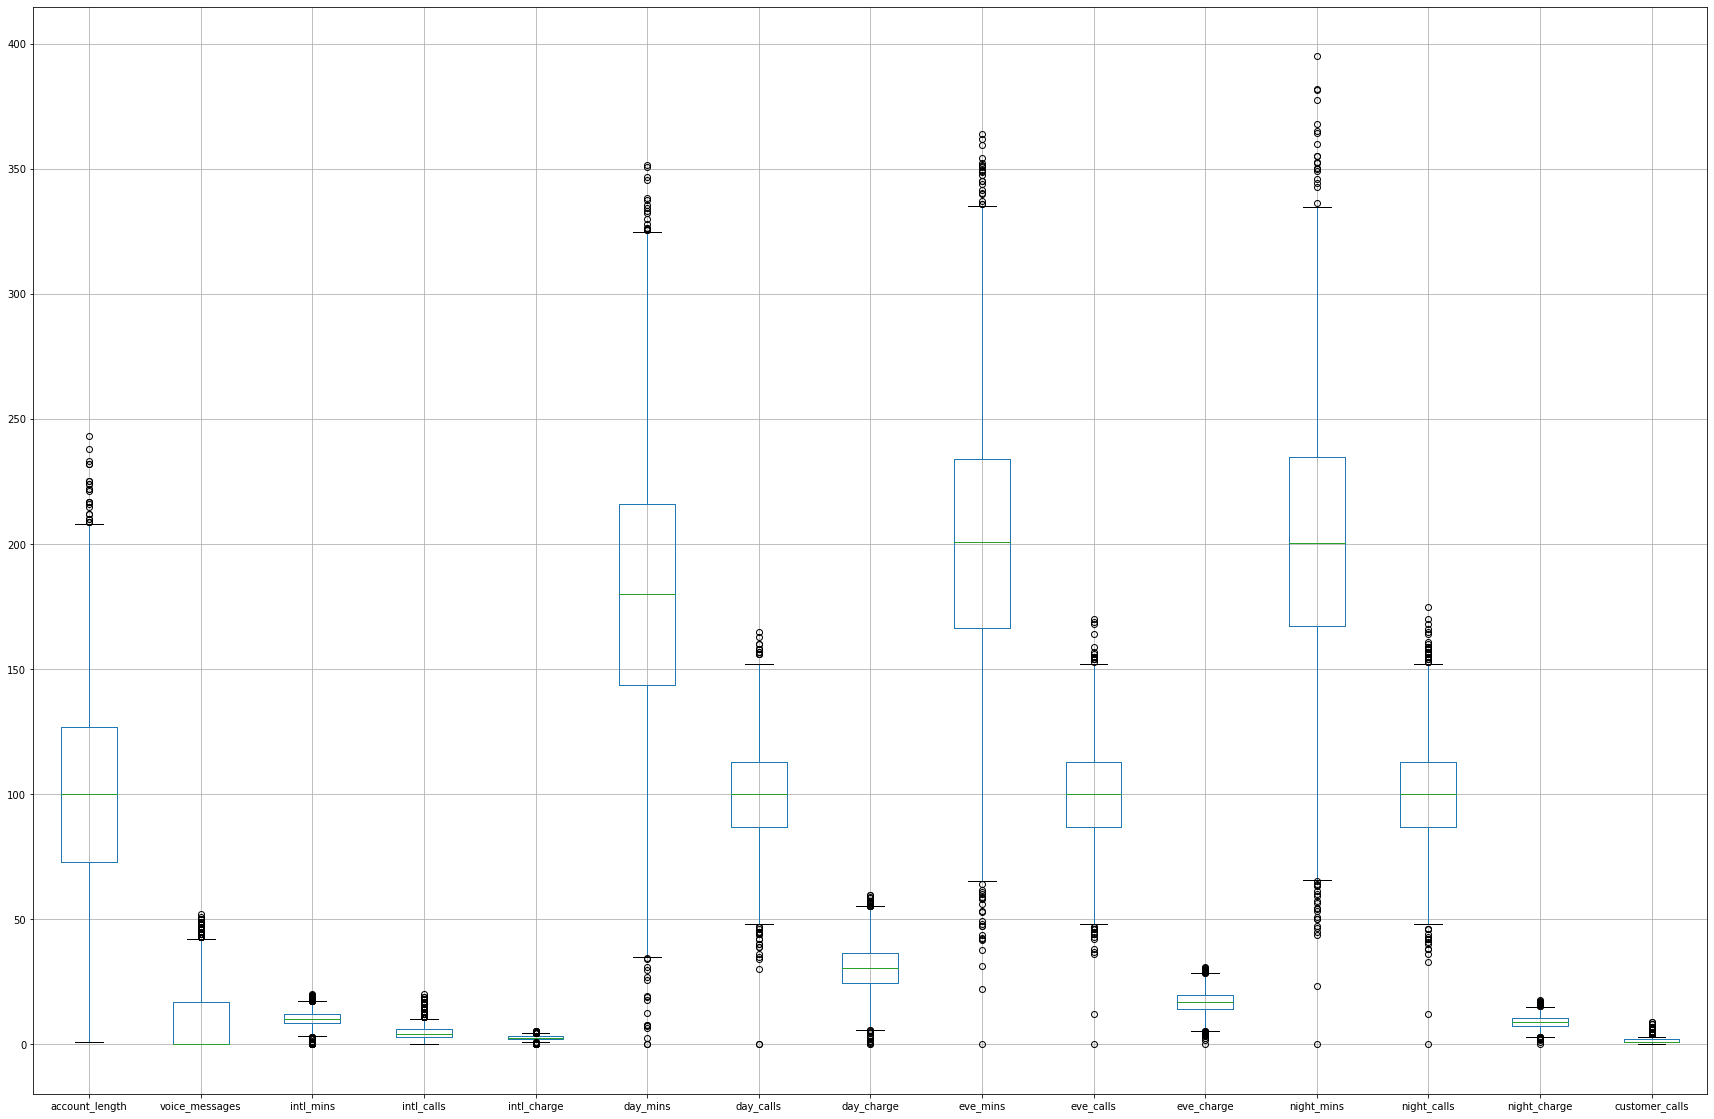

In [18]:
plt.figure(figsize=(30,20))
df.boxplot()
plt.show()

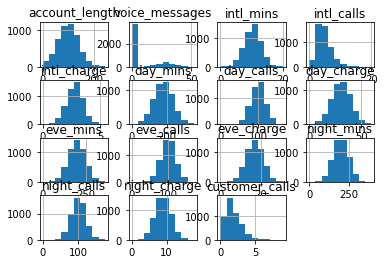

In [19]:
df.hist()
plt.show()

# Analyzing What The Dependent Variable Said To Us i.e 'CHURN'.

In [20]:
#Printing the unique value inside "churn" column
df["churn"].unique()

array(['no', 'yes'], dtype=object)

In [21]:
#Printing the count of true and false in 'churn' feature
print(df.churn.value_counts())

no     4264
yes     705
Name: churn, dtype: int64


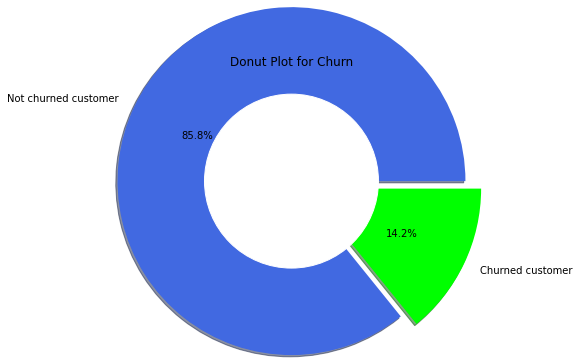

In [22]:
#To get the Donut Plot to analyze churn
data = df['churn'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Not churned customer','Churned customer'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

<AxesSubplot:xlabel='churn', ylabel='count'>

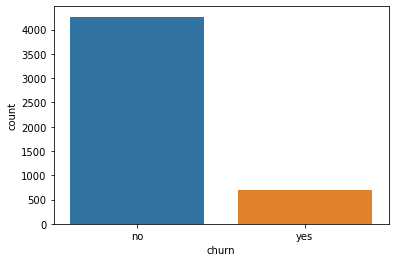

In [23]:
sns.countplot(df['churn'])

<AxesSubplot:xlabel='intl_calls', ylabel='count'>

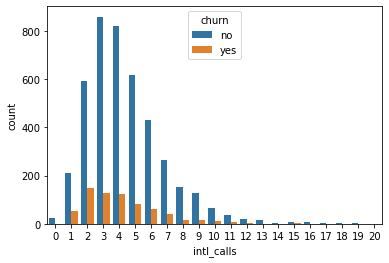

In [24]:
sns.countplot(df['intl_calls'],hue=df['churn'])


# Analyzing  "Account Length" column

In [25]:
#Separating churn and non churn customers
churn_df     = df[df["churn"] == bool(True)]
not_churn_df = df[df["churn"] == bool(False)]

<AxesSubplot:xlabel='account_length', ylabel='Density'>

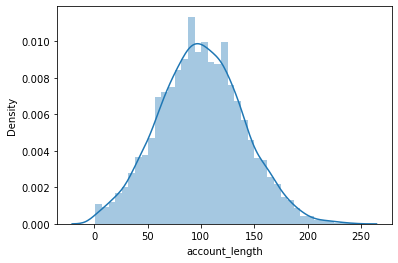

In [26]:
#Account length vs Churn
sns.distplot(df['account_length'])

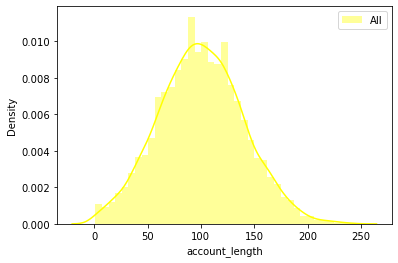

In [27]:
#comparison of churned account length and not churned account length 
sns.distplot(df['account_length'],color = 'yellow',label="All")
sns.distplot(churn_df['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df['account_length'],color = 'green',hist= False,label="Not churned")
plt.legend()

- *After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. let's see what other features say about the churn.*



# Analyzing "International Plan" column

In [28]:
#Show count value of 'yes','no'
df['intl_plan'].value_counts()

no     4499
yes     470
Name: intl_plan, dtype: int64

In [29]:
#Show the unique data of "International plan"
df["intl_plan"].unique()

array(['no', 'yes'], dtype=object)

In [30]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(df["intl_plan"],df["churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

churn        no  yes  Percentage Churn
intl_plan                             
no         3993  506         11.246944
yes         271  199         42.340426


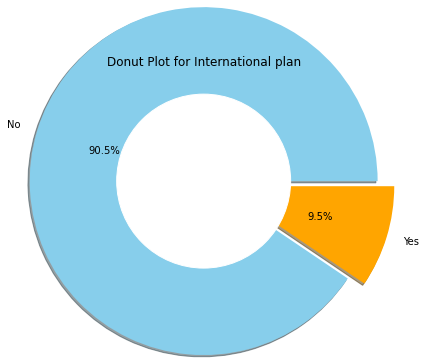

In [31]:
#To get the Donut Plot to analyze International Plan
data = df['intl_plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

<AxesSubplot:xlabel='intl_plan', ylabel='count'>

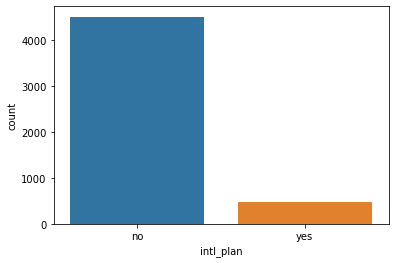

In [32]:
#Analyzing using count plot
sns.countplot(df['intl_plan'])

* From the above data we get*

* There are 4499 customers who dont have a international plan.*

* There are 470 customers who have a international plan.*

* Among those who have a international plan 42.3 % people churn.*

* Whereas among those who dont have a international plan only 11.24 % people churn.*

* So basically the people who bought International plans are churning in big numbers.*

* Probably because of connectivity issues or high call charge.*

# Analyzing "Voice Plan" column

In [33]:
#show the unique value of the "Voice mail plan" column
df["voice_plan"].unique()

array(['yes', 'no'], dtype=object)

In [34]:
#Calculate the Voice Plan vs Churn percentage
Voice_plan_data = pd.crosstab(df["voice_plan"],df["churn"])
Voice_plan_data['Percentage Churn'] = Voice_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_plan_data)

churn         no  yes  Percentage Churn
voice_plan                             
no          3050  604         16.529830
yes         1214  101          7.680608


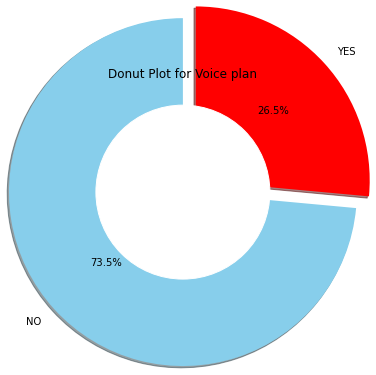

In [35]:
#To get the Donut Plot to analyze Voice plan
data = df['voice_plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice plan')
plt.show()

<AxesSubplot:xlabel='voice_plan', ylabel='count'>

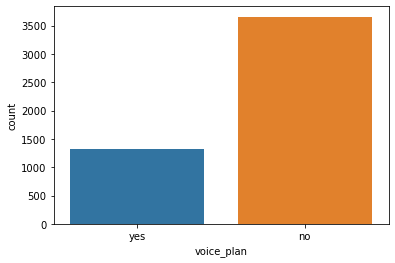

In [36]:
# analyzing voice_plan using count plot
sns.countplot(df['voice_plan'])


* As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.*

# Analyzing "voice_messages" column

In [37]:
#show the data of 'voice_messages' 
df['voice_messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6, 52],
      dtype=int64)

In [38]:
#Printing the data of 'voice_messages'
df['voice_messages'].value_counts()

0     3655
31      83
28      67
29      67
33      66
24      63
27      63
30      58
26      57
32      56
23      52
25      51
22      47
36      44
37      43
34      41
39      41
35      41
21      41
38      40
20      31
40      28
19      27
41      22
17      21
42      19
18      18
16      17
43      16
15      13
45      11
12      11
14       9
44       9
46       8
48       5
13       4
47       4
10       4
49       3
6        2
9        2
50       2
11       2
8        2
4        1
51       1
52       1
Name: voice_messages, dtype: int64

In [39]:
#Show the details of 'voice messages' data
df['voice_messages'].describe()

count    4969.000000
mean        7.754880
std        13.545738
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: voice_messages, dtype: float64

<AxesSubplot:xlabel='voice_messages', ylabel='Density'>

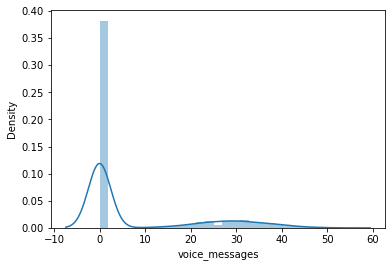

In [40]:
#Analysing by using displot diagram
sns.distplot(df['voice_messages'])

<Figure size 720x576 with 0 Axes>

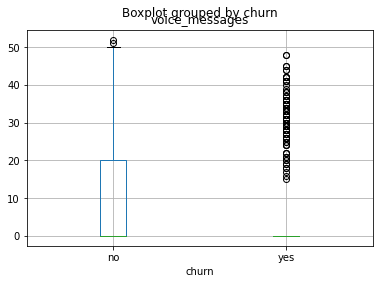

In [41]:
#Analysing by using boxplot diagram between 'voice_messages and 'churn'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='voice_messages', by='churn')
fig.suptitle('voice_messages', fontsize=14, fontweight='bold')
plt.show()

* After analyzing the above voice plan feature data we get an insight that when there are more than 20 voice plan messages then there is a churn*

* For that, we need to improve the voice plan quality.*

# Analyzing "customer_calls" column

In [42]:
#Printing the data of customer_calls 
df['customer_calls'].value_counts()

1    1772
2    1123
0    1016
3     660
4     251
5      96
6      34
7      13
9       2
8       2
Name: customer_calls, dtype: int64

In [43]:
#Calculating the Customer_calls vs Churn percentage
Customer_calls_data = pd.crosstab(df['customer_calls'],df["churn"])
Customer_calls_data['Percentage_Churn'] = Customer_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_calls_data)

churn             no  yes  Percentage_Churn
customer_calls                             
0                895  121         11.909449
1               1584  188         10.609481
2               1001  122         10.863758
3                587   73         11.060606
4                140  111         44.223108
5                 38   58         60.416667
6                 12   22         64.705882
7                  6    7         53.846154
8                  1    1         50.000000
9                  0    2        100.000000


<AxesSubplot:xlabel='customer_calls', ylabel='count'>

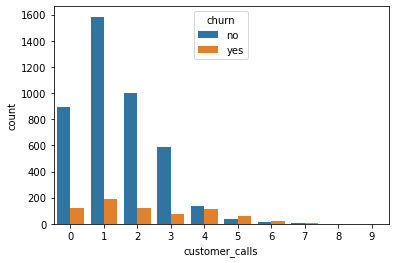

In [44]:
# Analysing using countplot
sns.countplot(x='customer_calls',hue="churn",data = df)

* It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.*

* The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,*

* And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.*

* So operator should work to improve the service call.*

# Analyzing all calls minutes,all calls, all calls charge together
* As these data sets are numerical data type, so for analysing with the 'churn' which is a catagorical data set, We are using mean, median, and box plots.*

In [45]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['day_calls'].mean())

churn
no      99.892355
yes    100.805674
Name: day_calls, dtype: float64


In [46]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['day_mins'].mean())

churn
no     175.746177
yes    207.886099
Name: day_mins, dtype: float64


In [47]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['day_charge'].mean())

churn
no     29.877425
yes    35.341064
Name: day_charge, dtype: float64


<AxesSubplot:xlabel='day_mins', ylabel='day_charge'>

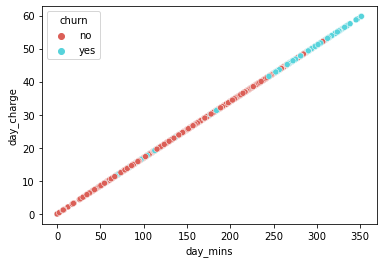

In [48]:
#show the relation using scatter plot
sns.scatterplot(x="day_mins", y="day_charge", hue="churn", data=df,palette='hls')

In [49]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['eve_calls'].mean())

churn
no     100.219512
yes     99.904965
Name: eve_calls, dtype: float64


In [50]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['eve_mins'].mean())

churn
no     198.786046
yes    211.693617
Name: eve_mins, dtype: float64


In [51]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['eve_charge'].mean())

churn
no     16.897045
yes    17.994099
Name: eve_charge, dtype: float64


<AxesSubplot:xlabel='eve_mins', ylabel='eve_charge'>

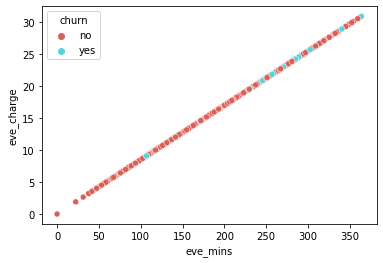

In [52]:
#show the relation using scatter plot
sns.scatterplot(x="eve_mins", y="eve_charge", hue="churn", data=df,palette='hls')

In [53]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['night_calls'].mean())

churn
no     100.009146
yes     99.624113
Name: night_calls, dtype: float64


In [54]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['night_charge'].mean())

churn
no     8.977622
yes    9.273986
Name: night_charge, dtype: float64


In [55]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['night_mins'].mean())

churn
no     199.500188
yes    206.086667
Name: night_mins, dtype: float64


<AxesSubplot:xlabel='night_mins', ylabel='night_charge'>

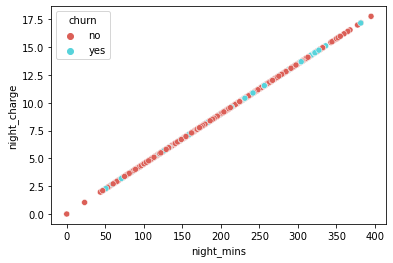

In [56]:
#show the relation using scatter plot
sns.scatterplot(x="night_mins", y="night_charge", hue="churn", data=df,palette='hls')

In [57]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['intl_mins'].mean())

churn
no     10.194536
yes    10.685532
Name: intl_mins, dtype: float64


In [58]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['intl_mins'].mean())

churn
no     10.194536
yes    10.685532
Name: intl_mins, dtype: float64


In [59]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["churn"])['intl_mins'].mean())

churn
no     10.194536
yes    10.685532
Name: intl_mins, dtype: float64


<AxesSubplot:xlabel='intl_mins', ylabel='intl_charge'>

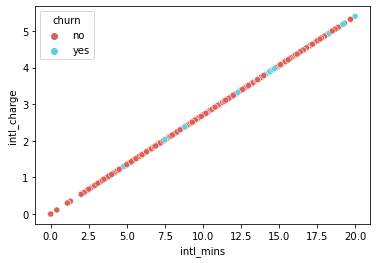

In [60]:
#show the relation using scatter plot
sns.scatterplot(x="intl_mins", y="intl_charge", hue="churn", data=df,palette='hls')

In [61]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_all = df['day_charge'].mean()/df['day_mins'].mean()
eve_charge_all = df['eve_charge'].mean()/df['eve_mins'].mean()
night_charge_all = df['night_charge'].mean()/df['night_mins'].mean()
intl_charge_all= df['intl_charge'].mean()/df['intl_mins'].mean()


In [62]:
print([day_charge_all,eve_charge_all,night_charge_all,intl_charge_all])

[0.1700030716294618, 0.08500108891079526, 0.04500054670875827, 0.27005046781745173]


<AxesSubplot:>

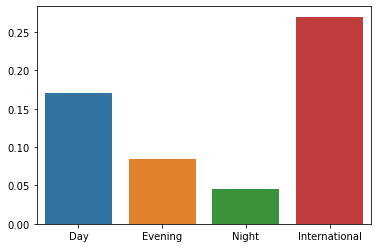

In [63]:
#Print the bar plot which shows the comparison of call caharge per minute
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_all,eve_charge_all,night_charge_all,intl_charge_all])

* After analyzing the above dataset we have noticed that day/night/eve mins/call/charges are not put any kind of cause for churn rate. But international call charges are high as compare to others it's an obvious thing but that may be a cause for international plan customers to churn out.*

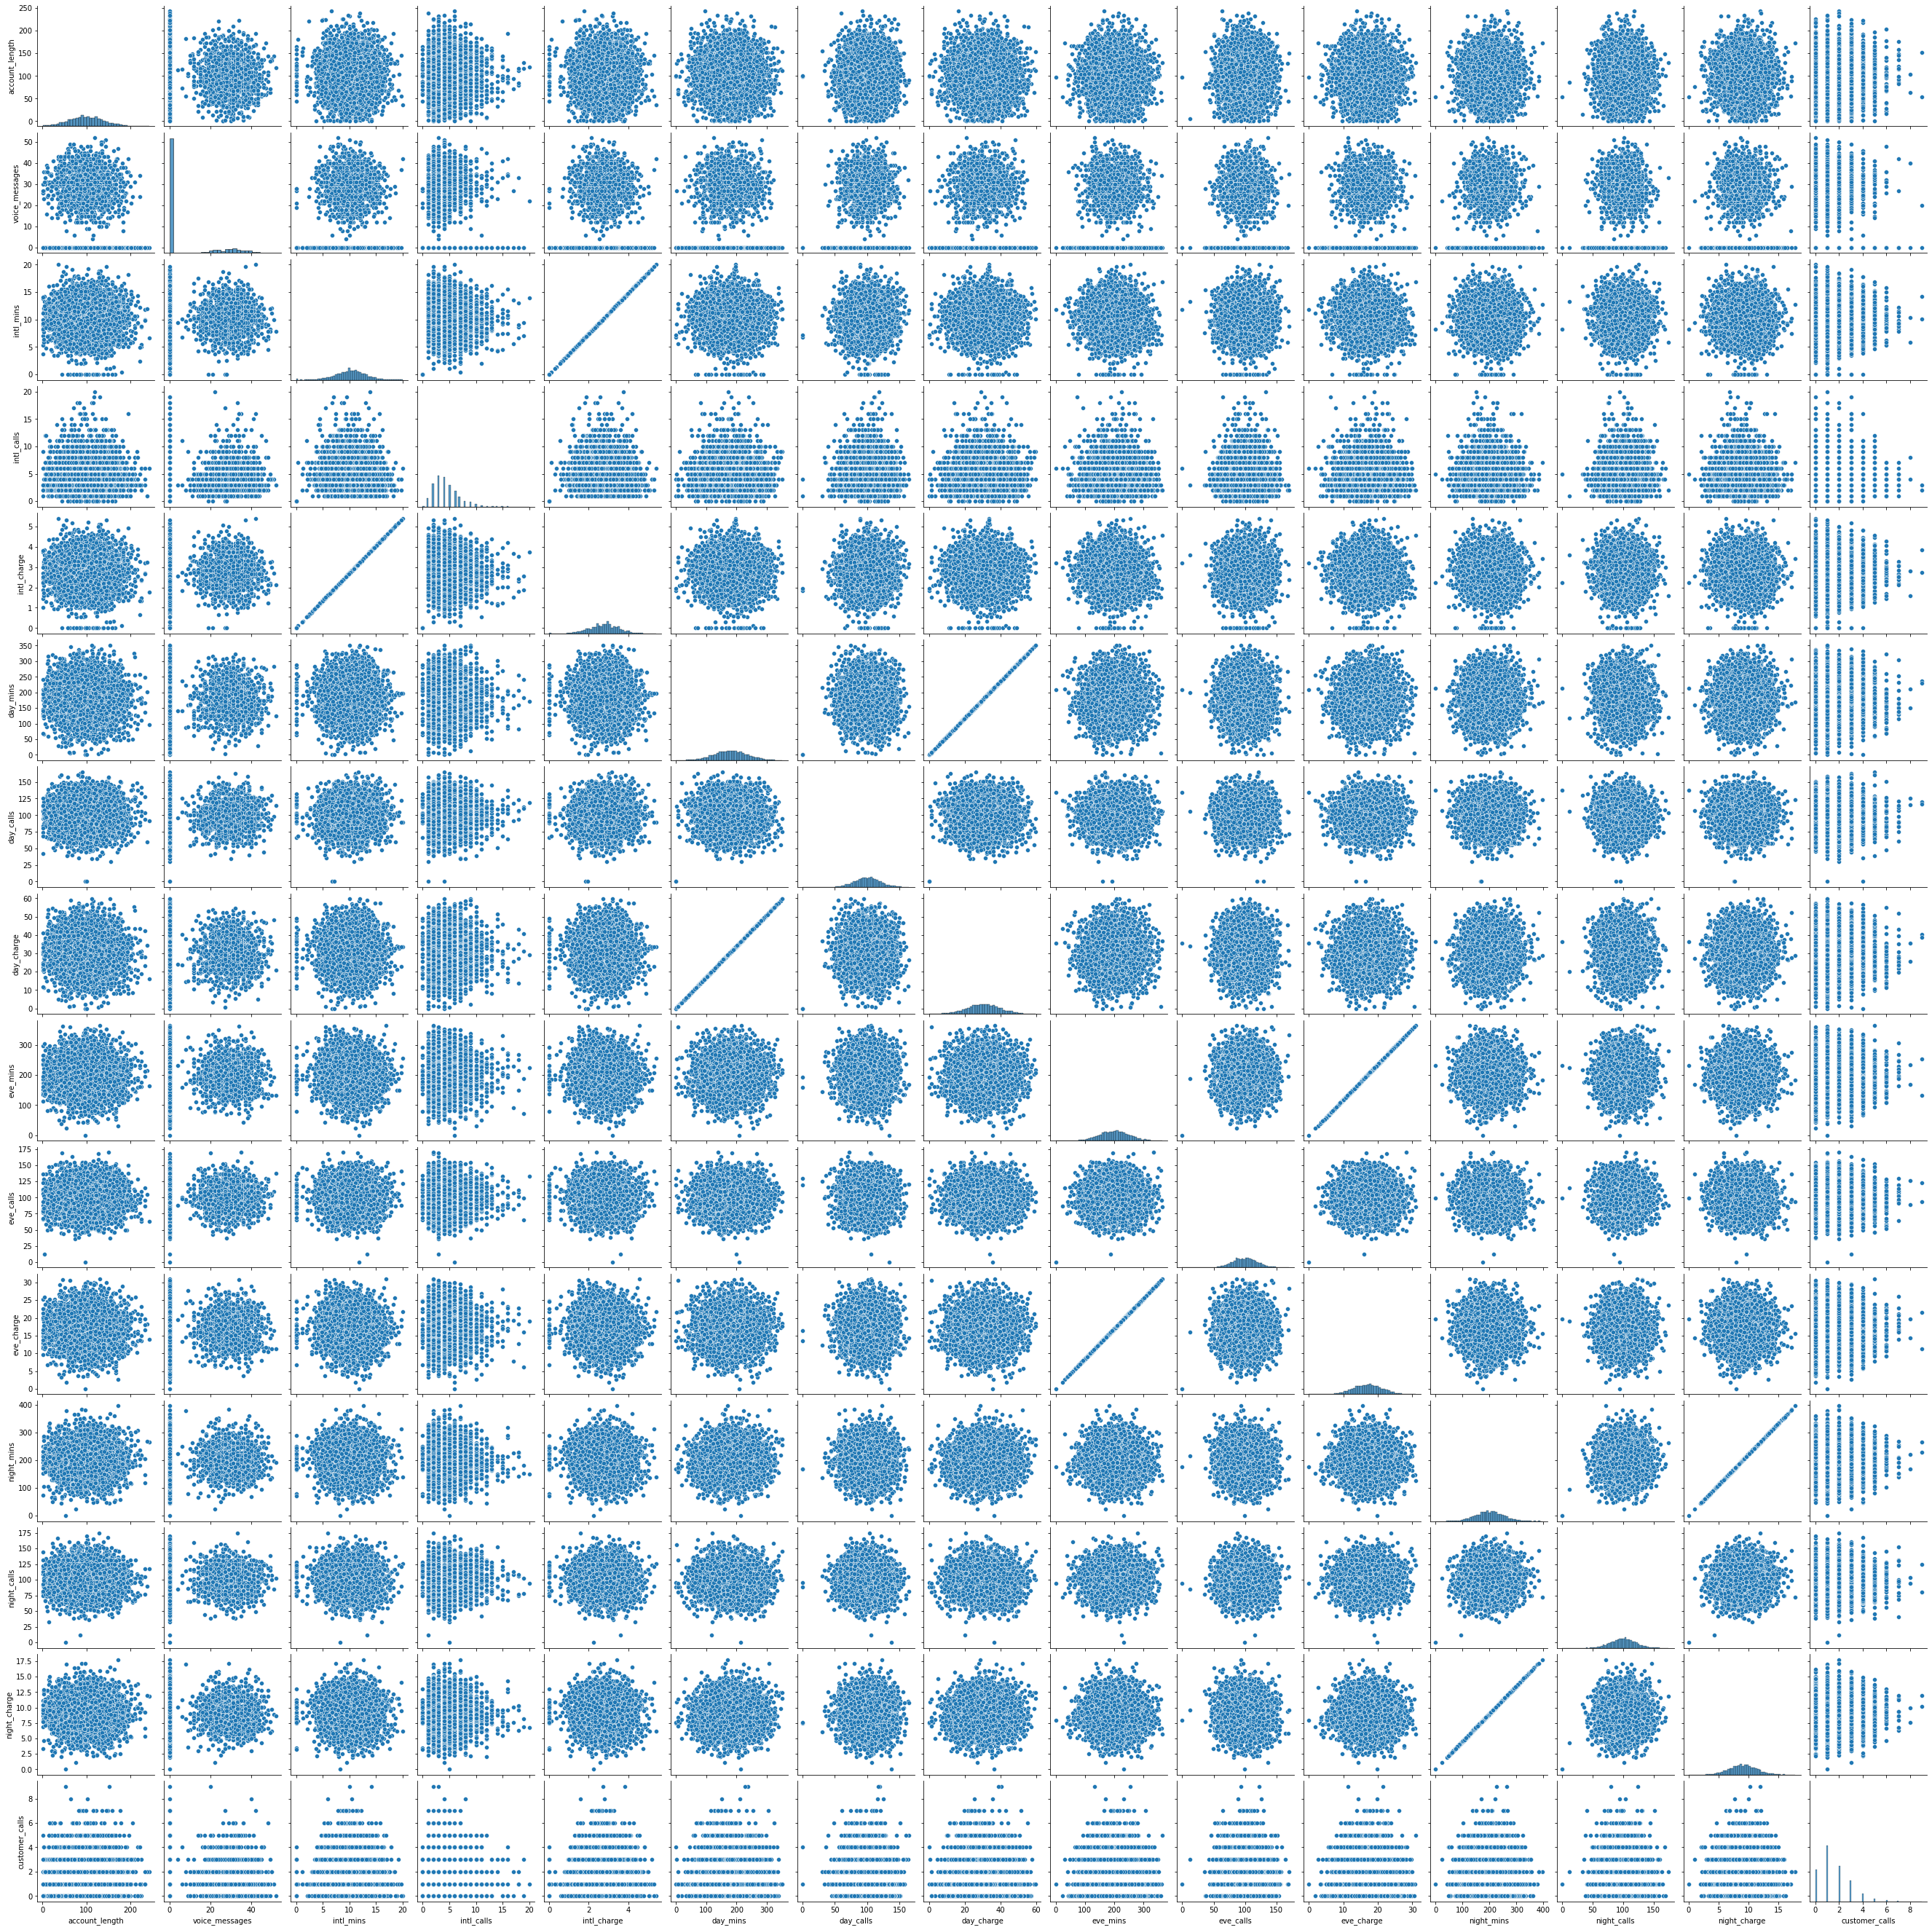

In [64]:
sns.pairplot(df)

# understanding the correlation

In [65]:
df.corr()

account_length  voice_messages  intl_mins  intl_calls  \
account_length        1.000000       -0.013682   0.004165    0.014686   
voice_messages       -0.013682        1.000000   0.001497   -0.000970   
intl_mins             0.004165        0.001497   1.000000    0.016604   
intl_calls            0.014686       -0.000970   0.016604    1.000000   
intl_charge           0.004173        0.001539   0.999993    0.016714   
day_mins             -0.000715        0.005641  -0.018335   -0.000541   
day_calls             0.027558        0.001008   0.014284    0.011457   
day_charge           -0.000717        0.005636  -0.018339   -0.000544   
eve_mins             -0.007600        0.018517  -0.000533    0.007402   
eve_calls             0.008187       -0.003682  -0.006097    0.006675   
eve_charge           -0.007597        0.018523  -0.000539    0.007407   
night_mins            0.001229        0.004094  -0.006178   -0.017202   
night_calls          -0.008077        0.001903   0.000429    0.000008   
night_charge          0.001218        0.004086  -0.006174   -0.017172   
customer_calls       -0.002457       -0.006676  -0.010839   -0.019519   

                intl_charge  day_mins  day_calls  day_charge  eve_mins  \
account_length     0.004173 -0.000715   0.027558   -0.000717 -0.007600   
voice_messages     0.001539  0.005641   0.001008    0.005636  0.018517   
intl_mins          0.999993 -0.018335   0.014284   -0.018339 -0.000533   
intl_calls         0.016714 -0.000541   0.011457   -0.000544  0.007402   
intl_charge        1.000000 -0.018261   0.014348   -0.018265 -0.000512   
day_mins          -0.018261  1.000000  -0.000342    1.000000 -0.011572   
day_calls          0.014348 -0.000342   1.000000   -0.000342 -0.001526   
day_charge        -0.018265  1.000000  -0.000342    1.000000 -0.011568   
eve_mins          -0.000512 -0.011572  -0.001526   -0.011568  1.000000   
eve_calls         -0.006151  0.006587   0.001984    0.006588  0.002429   
eve_charge        -0.000518 -0.011581  -0.001522   -0.011578  1.000000   
night_mins        -0.006119  0.011755   0.002023    0.011757 -0.017189   
night_calls        0.000411  0.004091  -0.008645    0.004090  0.016336   
night_charge      -0.006114  0.011738   0.002019    0.011740 -0.017191   
customer_calls    -0.010893  0.002573  -0.010938    0.002567 -0.011936   

                eve_calls  eve_charge  night_mins  night_calls  night_charge  \
account_length   0.008187   -0.007597    0.001229    -0.008077      0.001218   
voice_messages  -0.003682    0.018523    0.004094     0.001903      0.004086   
intl_mins       -0.006097   -0.000539   -0.006178     0.000429     -0.006174   
intl_calls       0.006675    0.007407   -0.017202     0.000008     -0.017172   
intl_charge     -0.006151   -0.000518   -0.006119     0.000411     -0.006114   
day_mins         0.006587   -0.011581    0.011755     0.004091      0.011738   
day_calls        0.001984   -0.001522    0.002023    -0.008645      0.002019   
day_charge       0.006588   -0.011578    0.011757     0.004090      0.011740   
eve_mins         0.002429    1.000000   -0.017189     0.016336     -0.017191   
eve_calls        1.000000    0.002444    0.002049    -0.012014      0.002068   
eve_charge       0.002444    1.000000   -0.017197     0.016339     -0.017199   
night_mins       0.002049   -0.017197    1.000000     0.026641      0.999999   
night_calls     -0.012014    0.016339    0.026641     1.000000      0.026616   
night_charge     0.002068   -0.017199    0.999999     0.026616      1.000000   
customer_calls   0.005985   -0.011949   -0.007066    -0.008429     -0.007063   

                customer_calls  
account_length       -0.002457  
voice_messages       -0.006676  
intl_mins            -0.010839  
intl_calls           -0.019519  
intl_charge          -0.010893  
day_mins              0.002573  
day_calls            -0.010938  
day_charge            0.002567  
eve_mins             -0.011936  
eve_calls             0.005985  
eve_charge        

<AxesSubplot:>

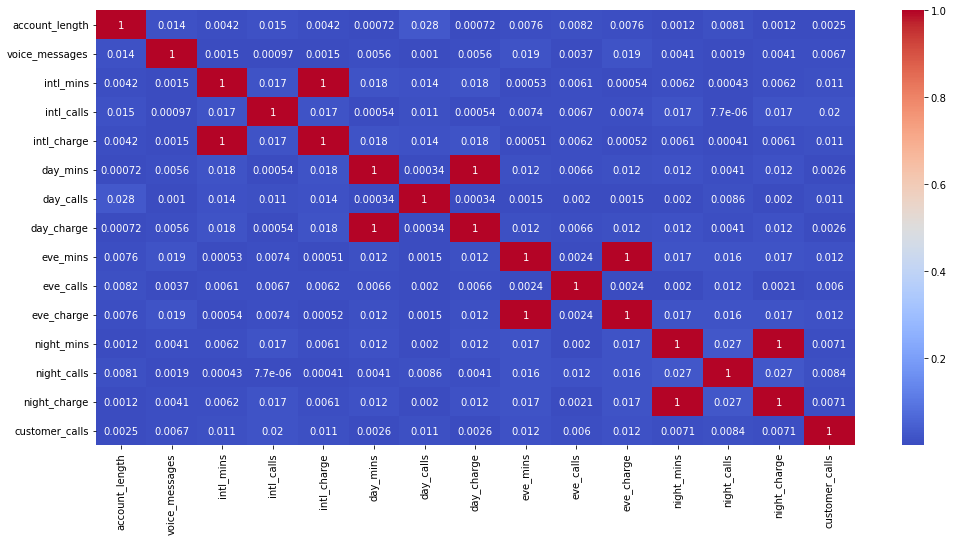

In [66]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# VIF 

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# extracting the numerical columns
cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
data = df[cols]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns
  
# calculating VIF for each feature
vif_data['VIF']= [variance_inflation_factor(data.values, i)
                  for i in range(len(data.columns))]

# printing the VIF of each feature
print(vif_data)

           Feature           VIF
0   account_length  7.092979e+00
1   voice_messages  1.326905e+00
2        intl_mins  1.011248e+06
3       intl_calls  4.178592e+00
4      intl_charge  1.011757e+06
5         day_mins  1.245249e+08
6        day_calls  2.197438e+01
7       day_charge  1.245293e+08
8         eve_mins  3.727414e+07
9        eve_calls  2.186351e+01
10      eve_charge  3.727525e+07
11      night_mins  1.056219e+07
12     night_calls  2.167217e+01
13    night_charge  1.056225e+07
14  customer_calls  2.415934e+00


In [68]:
# Removing  the highly correlated features
df = df.drop(['day_mins','eve_mins','night_mins','intl_mins'], axis=1)

<AxesSubplot:>

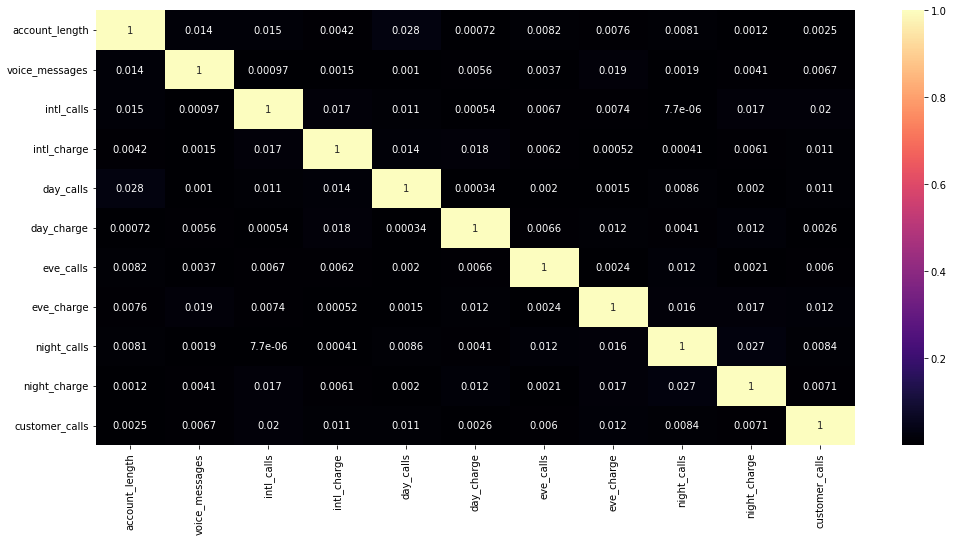

In [69]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='magma')

# Feature Engineering


In [70]:
# Discreet value integer encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [71]:
intl_plan=df['intl_plan'] = label_encoder.fit_transform(df['intl_plan'])
voice_plan=df['voice_plan'] = label_encoder.fit_transform(df['voice_plan'])


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [73]:
df.churn.replace(['yes','no'],[1,0],inplace=True)
Y = df['churn']
X = df.drop('churn', axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=11)
print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',x_test.shape, y_test.shape)

Shape of x_train and y_train:  (4472, 13) (4472,)
Shape of x_test and y_test:  (497, 13) (497,)


In [74]:
scaler = MinMaxScaler()
scaled_churn_data = scaler.fit_transform(x_train)
scaled_X_train = pd.DataFrame(scaled_churn_data,columns=x_test.columns)

In [75]:
scaled_X_train

account_length  voice_plan  voice_messages  intl_plan  intl_calls  \
0           0.537190         0.0        0.000000        0.0    0.368421   
1           0.376033         0.0        0.000000        0.0    0.105263   
2           0.388430         0.0        0.000000        0.0    0.157895   
3           0.657025         0.0        0.000000        0.0    0.263158   
4           0.760331         1.0        0.352941        0.0    0.263158   
...              ...         ...             ...        ...         ...   
4467        0.136364         0.0        0.000000        0.0    0.526316   
4468        0.619835         0.0        0.000000        0.0    0.526316   
4469        0.607438         0.0        0.000000        0.0    0.210526   
4470        0.235537         1.0        0.568627        0.0    0.157895   
4471        0.330579         0.0        0.000000        0.0    0.157895   

      intl_charge  day_calls  day_charge  eve_calls  eve_charge  night_calls  \
0        0.329630   0.575758    0.311580   0.282353    0.913297     0.635294   
1        0.559259   0.624242    0.522590   0.570588    0.744096     0.611765   
2        0.685185   0.581818    0.578648   0.358824    0.463604     0.617647   
3        0.514815   0.587879    0.346553   0.570588    0.245552     0.541176   
4        0.425926   0.678788    0.295515   0.652941    0.632481     0.700000   
...           ...        ...         ...        ...         ...          ...   
4467     0.550000   0.539394    0.835509   0.417647    0.749272     0.447059   
4468     0.535185   0.551515    0.499833   0.747059    0.418958     0.517647   
4469     0.564815   0.812121    0.245482   0.541176    0.678098     0.535294   
4470     0.550000   0.509091    0.681560   0.470588    0.500809     0.588235   
4471     0.685185   0.509091    0.439592   0.535294    0.594630     0.482353   

      night_charge  customer_calls  
0         0.655037        0.111111  
1         0.336522        0.000000  
2         0.438379        0.222222  
3         0.381542        0.111111  
4         0.394485        0.000000  
...            ...             ...  
4467      0.451322        0.222222  
4468      0.354530        0.111111  
4469      0.637029        0.111111  
4470      0.299381        0.222222  
4471      0.581880        0.111111  

[4472 rows x 13 columns]

In [76]:
scaled_churn_test= scaler.transform(x_test)
scaled_X_test = pd.DataFrame(scaled_churn_test,columns=x_test.columns)

# Modeling

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf

# Logistic Regression

In [78]:
model_logistic = LogisticRegression()
model_logistic.fit(scaled_X_train,y_train)

LogisticRegression()

In [79]:
y_pred = model_logistic.predict(scaled_X_test)

In [80]:
acc1 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc1)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       426
           1       0.63      0.24      0.35        71

    accuracy                           0.87       497
   macro avg       0.76      0.61      0.64       497
weighted avg       0.85      0.87      0.85       497

Accuracy = 0.8712273641851107


# SVM Classifier

In [81]:
clf = SVC()

kernel: 'poly'
parameters ={'kernel':['rbf'],
              'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
                         'kernel': ['rbf']})

In [82]:
gsv.best_params_

{'C': 50, 'gamma': 0.5, 'kernel': 'rbf'}

In [83]:
gsv.best_score_

0.9324694391179291

In [84]:
svc_model = SVC(C = 50, gamma =50, kernel='rbf')
svc_model.fit(x_train , y_train)

SVC(C=50, gamma=50)

In [85]:
y_pred_svc = svc_model.predict(x_test)

In [86]:
acc2 = accuracy_score(y_test,y_pred_svc)
print('Classification Report : \n',classification_report(y_test,y_pred_svc))
print('='*50)
print('Accuracy =',acc2)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       426
           1       0.00      0.00      0.00        71

    accuracy                           0.86       497
   macro avg       0.43      0.50      0.46       497
weighted avg       0.73      0.86      0.79       497

Accuracy = 0.8571428571428571


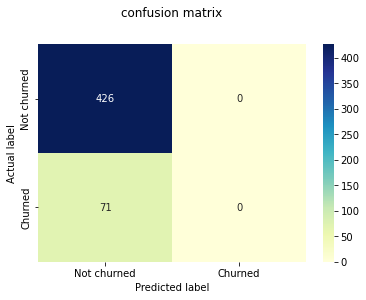

In [87]:
cm = confusion_matrix(y_test,y_pred_svc)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [88]:
svc_model.score(x_train,y_train)

1.0

In [89]:
svc_model.score(x_test,y_test)

0.8571428571428571

# Decision Tree

In [90]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=124)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=124),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [91]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto',
                       random_state=124)

In [92]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9, max_features='auto', random_state=124)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=124)

In [93]:
#Predicting on test data
y_pred_dt = dt_model.predict(x_test) # predicting on test data set 
y_pred_dt

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

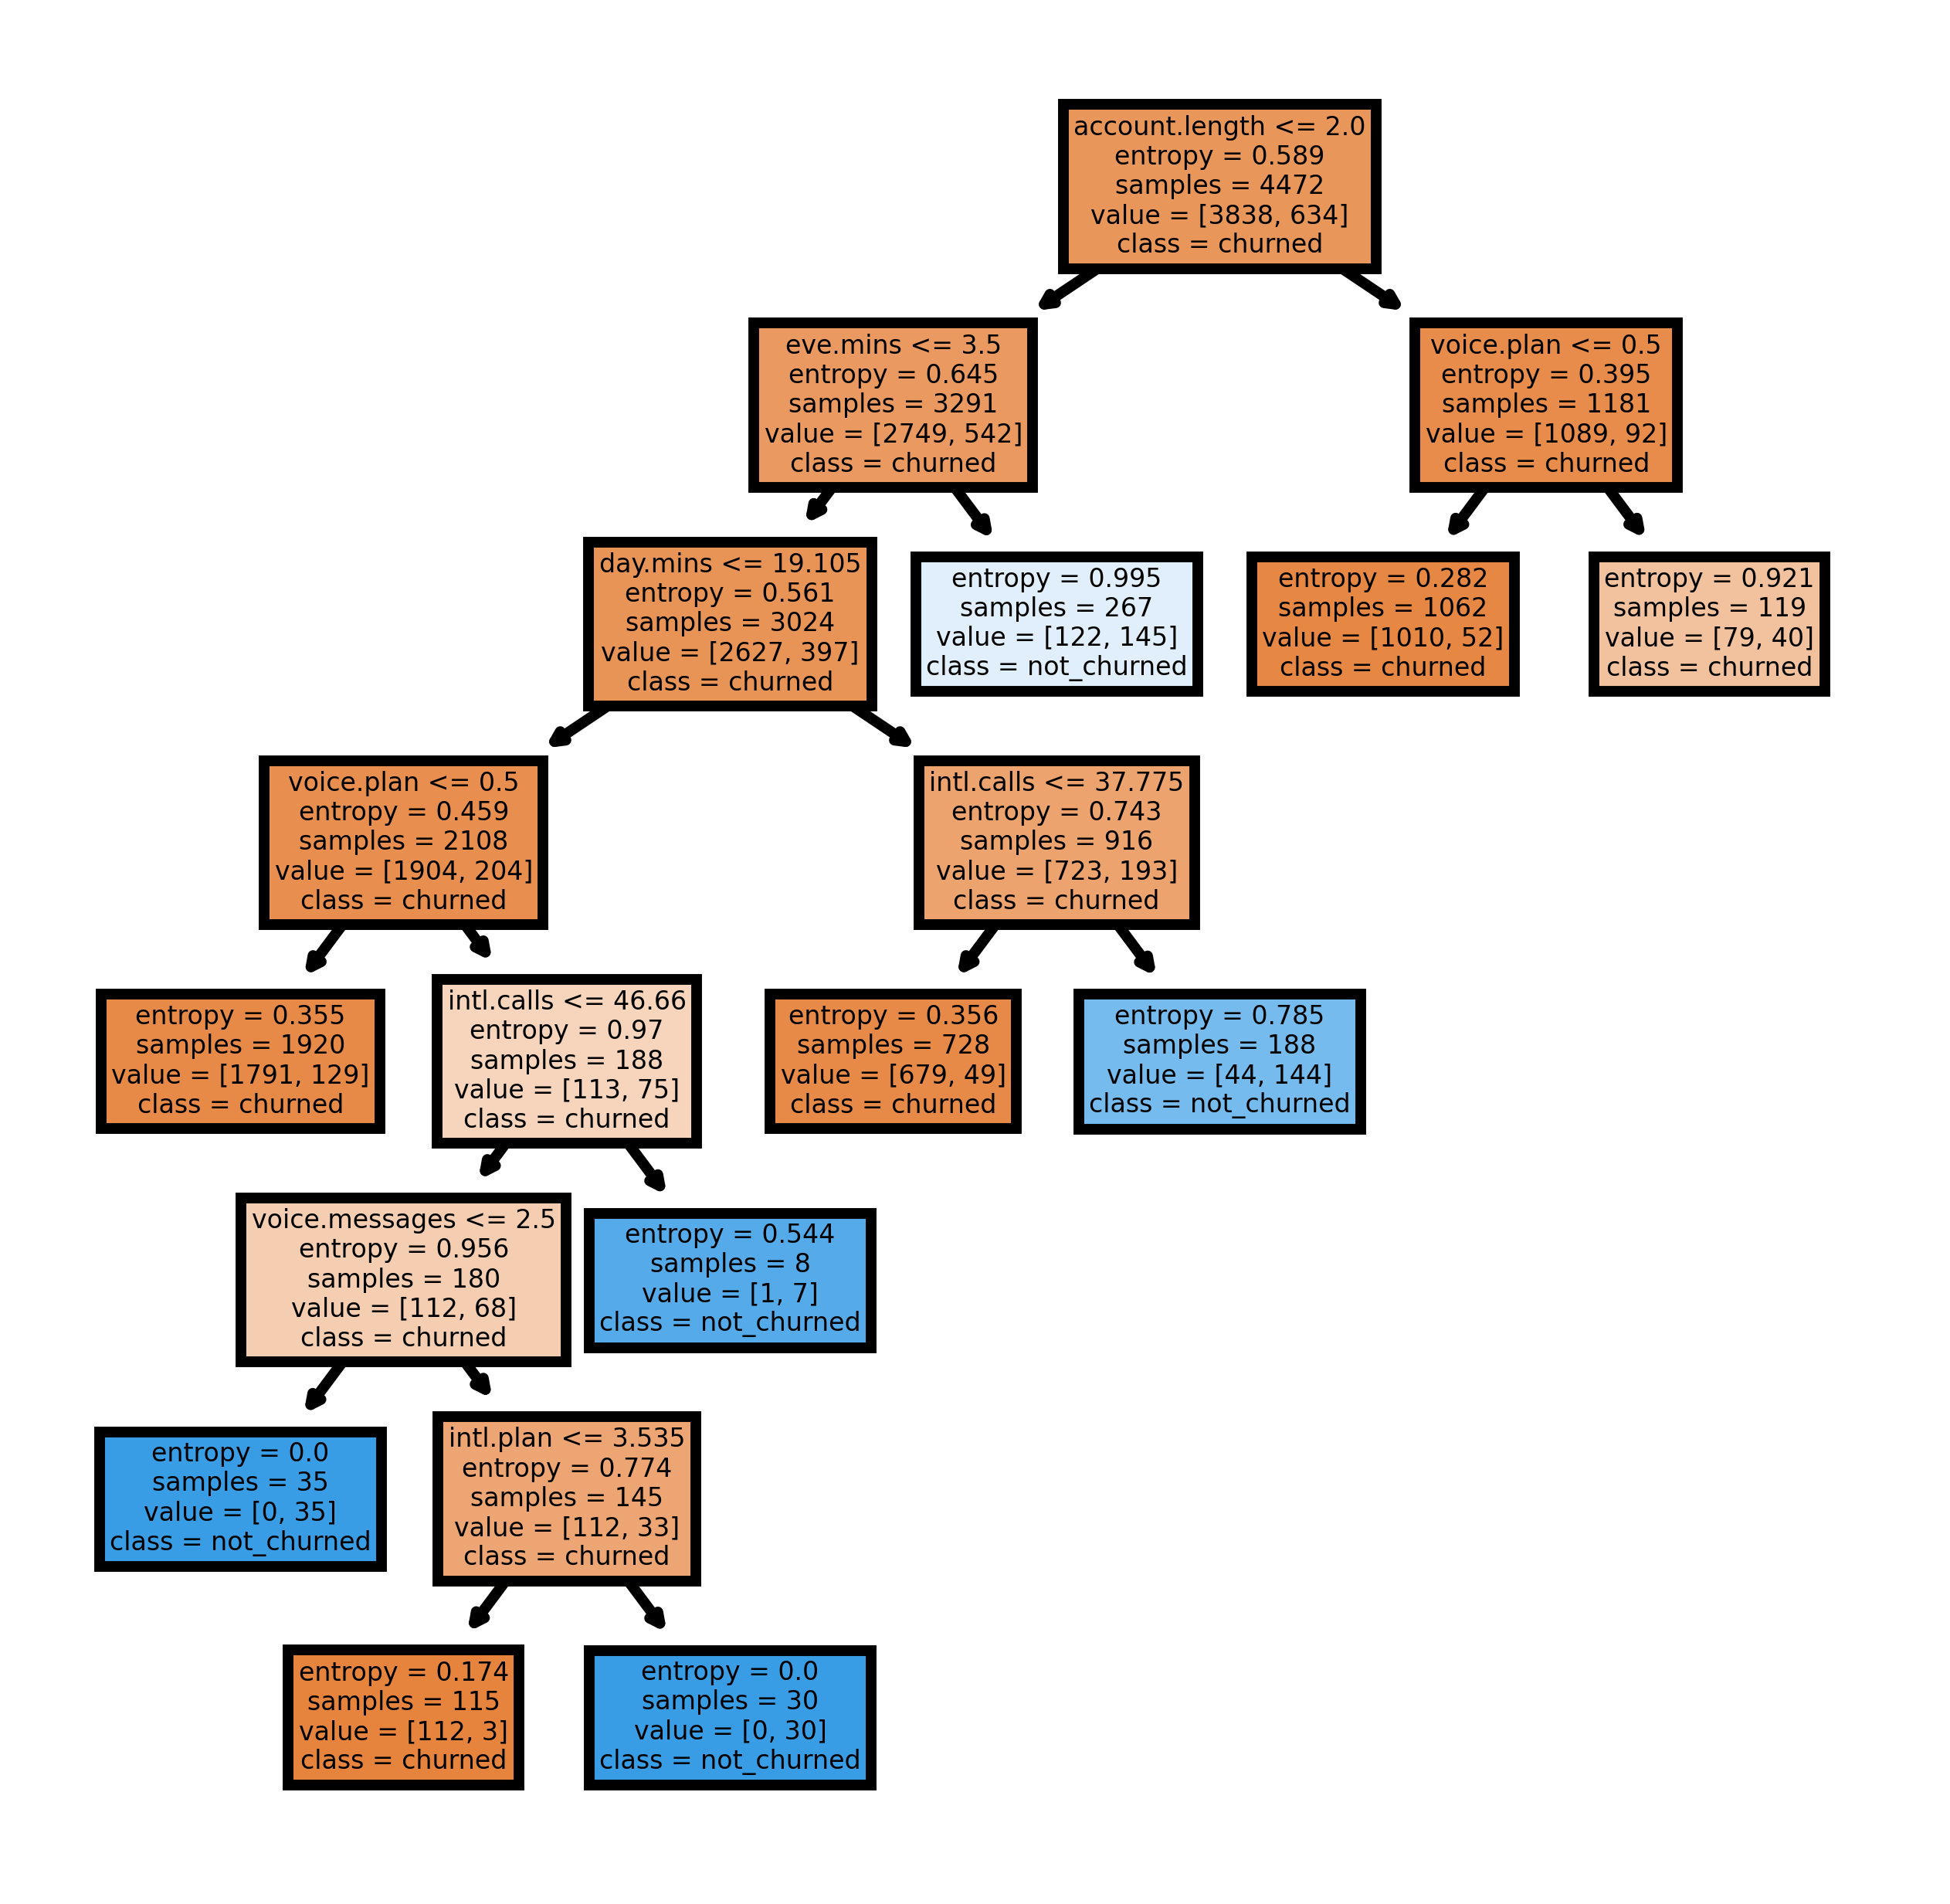

In [94]:
fn=['state','area.code','account.length','voice.plan','voice.messages','intl.plan','intl.mins','intl.calls','intl.charge','day.mins','day.calls','day.charge','eve.mins','eve.calls','eve.charge','night.mins','night.calls','night.charge','customer.calls']
cn=['churned','not_churned']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [95]:
acc3 = accuracy_score(y_test,y_pred_dt)
print('Classification Report : \n',classification_report(y_test,y_pred_dt))
print('='*50)
print('Accuracy =',acc3)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       426
           1       0.63      0.62      0.62        71

    accuracy                           0.89       497
   macro avg       0.78      0.78      0.78       497
weighted avg       0.89      0.89      0.89       497

Accuracy = 0.8933601609657947


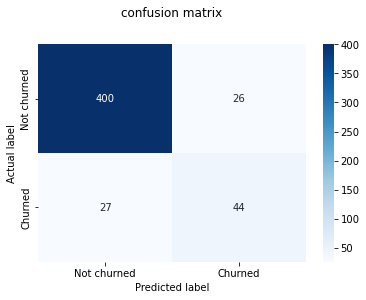

In [96]:
cm = confusion_matrix(y_test,y_pred_dt)
class_label = ["Not churned", "Churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [97]:
dt_model.score(x_train,y_train)

0.9016100178890877

In [98]:
dt_model.score(x_test,y_test)

0.8933601609657947

# Random Forest


In [99]:
rfc=RandomForestClassifier(random_state=42)

In [100]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [101]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [102]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [103]:
rfc_model = RandomForestClassifier(n_estimators = 200,max_features="auto" ,max_depth=8 ,criterion = "gini")
rfc_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200)

In [104]:
y_pred_rfc = rfc_model.predict(x_test)

In [105]:
acc4 = accuracy_score(y_test,y_pred_rfc)
print("Classification report : \n",classification_report(y_test,y_pred_rfc))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       426
           1       0.98      0.66      0.79        71

    accuracy                           0.95       497
   macro avg       0.96      0.83      0.88       497
weighted avg       0.95      0.95      0.95       497

Accuracy Score 0.9496981891348089


Text(0.5, 14.09375, 'Predicted label')

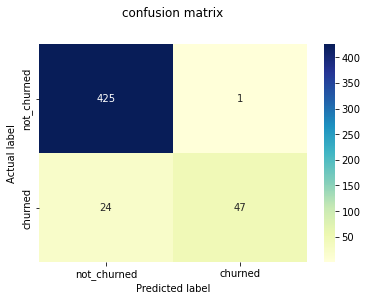

In [106]:
cm = confusion_matrix(y_test,y_pred_rfc)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [107]:
rfc_model.score(x_train,y_train)

0.9646690518783542

In [108]:
rfc_model.score(x_test,y_test)

0.9496981891348089

# K-Nearest Neighbor

In [109]:
KNN=KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [110]:
# defining parameter range
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [111]:
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [112]:
grid_search.best_params_

{'n_neighbors': 4}

In [113]:
KNN_model = KNeighborsClassifier(n_neighbors=2)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [114]:
y_pred_knn = KNN_model.predict(x_test)

In [115]:
acc5 = accuracy_score(y_test,y_pred_knn)
print("Classification report : \n",classification_report(y_test,y_pred_knn))
print("="*50)
print("Accuracy Score",acc4)
print("="*50)

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       426
           1       0.64      0.10      0.17        71

    accuracy                           0.86       497
   macro avg       0.75      0.54      0.55       497
weighted avg       0.84      0.86      0.82       497

Accuracy Score 0.9496981891348089


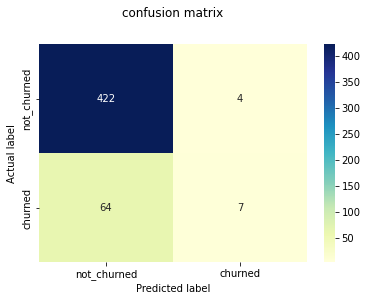

In [116]:
cm = confusion_matrix(y_test,y_pred_knn)
class_label = ["not_churned", "churned"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [117]:
KNN_model.score(x_train,y_train)

0.8913237924865832

In [118]:
KNN_model.score(x_test,y_test)

0.8631790744466801

# ANN Model

In [119]:
# Define the model architecture
ANN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, input_shape=(x_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ANN_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))



# Evaluate the model on the test set
loss, acc6 = ANN_model.evaluate(x_test, y_test)

Epoch 1/100
140/140 [==============================] - 5s 11ms/step - loss: 0.6209 - accuracy: 0.8155 - val_loss: 0.4504 - val_accuracy: 0.8249
Epoch 2/100
140/140 [==============================] - 1s 6ms/step - loss: 0.4226 - accuracy: 0.8502 - val_loss: 0.4069 - val_accuracy: 0.8571
Epoch 3/100
140/140 [==============================] - 1s 6ms/step - loss: 0.3915 - accuracy: 0.8564 - val_loss: 0.3750 - val_accuracy: 0.8672
Epoch 4/100
140/140 [==============================] - 1s 6ms/step - loss: 0.3842 - accuracy: 0.8589 - val_loss: 0.3685 - val_accuracy: 0.8511
Epoch 5/100
140/140 [==============================] - 1s 6ms/step - loss: 0.3662 - accuracy: 0.8614 - val_loss: 0.3736 - val_accuracy: 0.8431
Epoch 6/100
140/140 [==============================] - 1s 5ms/step - loss: 0.3692 - accuracy: 0.8609 - val_loss: 0.3856 - val_accuracy: 0.8612
Epoch 7/100
140/140 [==============================] - 1s 6ms/step - loss: 0.3598 - accuracy: 0.8614 - val_loss: 0.3892 - val_accuracy: 0.827

Epoch 58/100
140/140 [==============================] - 1s 8ms/step - loss: 0.2858 - accuracy: 0.8851 - val_loss: 0.2987 - val_accuracy: 0.8773
Epoch 59/100
140/140 [==============================] - 1s 8ms/step - loss: 0.2913 - accuracy: 0.8819 - val_loss: 0.3155 - val_accuracy: 0.8732
Epoch 60/100
140/140 [==============================] - 2s 11ms/step - loss: 0.2824 - accuracy: 0.8898 - val_loss: 0.3154 - val_accuracy: 0.8672
Epoch 61/100
140/140 [==============================] - 1s 5ms/step - loss: 0.2823 - accuracy: 0.8873 - val_loss: 0.2979 - val_accuracy: 0.8753
Epoch 62/100
140/140 [==============================] - 1s 5ms/step - loss: 0.2775 - accuracy: 0.8920 - val_loss: 0.3011 - val_accuracy: 0.8712
Epoch 63/100
140/140 [==============================] - 1s 6ms/step - loss: 0.2791 - accuracy: 0.8911 - val_loss: 0.2935 - val_accuracy: 0.8873
Epoch 64/100
140/140 [==============================] - 1s 5ms/step - loss: 0.2824 - accuracy: 0.8889 - val_loss: 0.2914 - val_accuracy

In [120]:
print("Test Accuracy",acc6)

Test Accuracy 0.8812877535820007
